MNIST handwritten digit classification using deep learning ( neural network)

Import dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [10]:
import matplotlib.pyplot as plt

  loading the MNIST data from keras.datasets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# printing the 10th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(x_train[10].shape)

(28, 28)


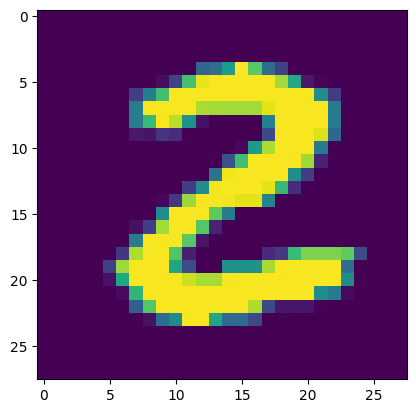

In [11]:
# displaying the image
plt.imshow(x_train[25])
plt.show()

In [12]:
print(y_train[25])

2


Image lables

In [13]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [14]:
# unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [15]:
# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, if not, we have to resize all the
images to a common dimension

In [16]:
# scaling the values
x_train = x_train/255
x_test = x_test/255

In [17]:
# printing the 10 th image
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [27]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# training the Nerual Network
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2955 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0853 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0710 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0543 - accuracy: 0.9822
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0486 - accuracy: 0.9845
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.03

Accuarcy on Test data

In [29]:
loss, accuarcy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0978 - accuracy: 0.9731


In [30]:
print(x_test.shape)

(10000, 28, 28)


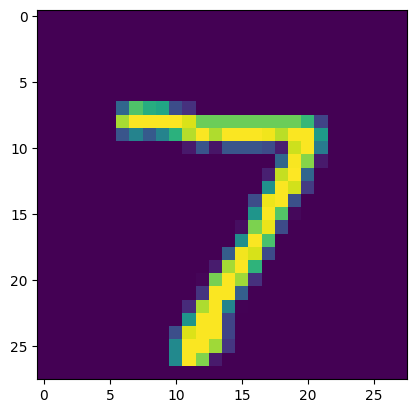

In [32]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [33]:
print(y_test[0])

7


In [34]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [35]:
print(y_pred.shape)

(10000, 10)


In [36]:
print(y_pred[0])

[1.3117857e-02 1.1339148e-01 7.7827626e-01 4.3752405e-01 2.8402921e-08
 5.8315978e-03 1.7038543e-10 9.9999869e-01 3.0130157e-01 2.1748391e-01]


In [37]:
# converting the prediction probablility to class labels

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [38]:
# conveting the prediction probabilities to class label for all test data point
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [39]:
# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [40]:
print(conf_mat)

tf.Tensor(
[[ 959    0    3    3    1    5    6    1    2    0]
 [   0 1127    3    1    0    1    1    0    2    0]
 [   1    2 1010    3    4    0    2    8    1    1]
 [   0    0    7  981    0   11    0    4    5    2]
 [   2    1    2    0  941    1    5    3    3   24]
 [   1    0    0    7    1  874    4    0    4    1]
 [   3    3    2    1    6   14  929    0    0    0]
 [   1    6    9    3    1    0    0 1000    1    7]
 [   2    2    7    5    2   17    3    3  930    3]
 [   3    3    0    7    6    5    1    4    0  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

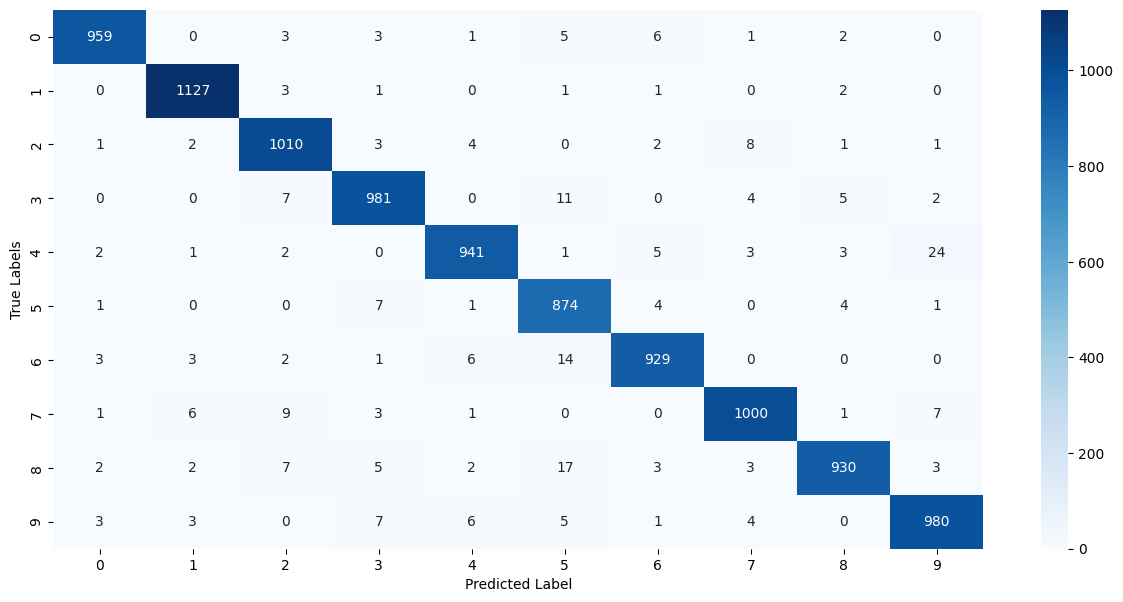

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Label')

# Building a Predicitive System

prediction image link:


 https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67



In [42]:
input_image_path = '/content/MNIST_digit.png'

In [43]:
input_image = cv2.imread(input_image_path)

In [44]:
type(input_image)

numpy.ndarray

In [45]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


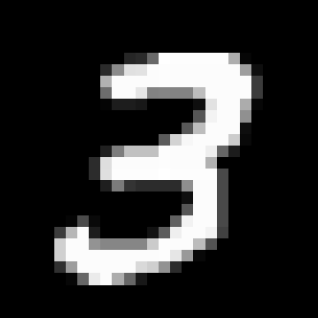

In [47]:
cv2_imshow(input_image)

In [48]:
input_image.shape

(318, 318, 3)

In [50]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [51]:
grayscale.shape

(318, 318)

In [53]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [54]:
input_image_resize.shape

(28, 28)

In [56]:
from google.colab.patches import cv2_imshow

In [58]:
cv2.imshow(input_image_resize)

DisabledFunctionError: ignored

In [59]:
input_image_resize = input_image_resize/255

In [60]:
type(input_image_resize)

numpy.ndarray

In [61]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [62]:
input_prediction = model.predict(image_reshaped)

1/1 [==============================] - 0s 56ms/step


In [63]:
print(input_prediction)

[[2.9190975e-05 2.7974662e-03 9.7459012e-01 1.0000000e+00 2.3211682e-13
  9.5273650e-01 1.5059551e-12 2.8055925e-03 6.1716837e-01 2.5112560e-01]]


In [64]:
input_pred_label = np.argmax(input_prediction)

In [65]:
print(input_pred_label)

3


Predictive System

In [67]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2.imshow(input_image)

grayscale = cv2.cvt.Color(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image.reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as', input_pred_label)

Path of the image to be predicted:/content/MNIST_digit.png


DisabledFunctionError: ignored